# 목표

- EDA 진행중 수행하는 시각화는 평면적인 데이터에서 주요 특성을 드러내는 효과적인 방법

- 데이터 종류 (복습)
 
|범주형|--|예시|특징|
|--|--|--|--|
|명목형|--|성별, 음식종류|순위가 없다.서열없다|
|순서형|--|학점, 순위, 평점|순위를 매길수 있다. |
* 사칙연산이 가능한 데이터

|수치형|--|예시|특징|
|--|--|--|--|
|이산형|--|메뉴개수, 책개수|정수로 떨어지는 셀 수 있는 데이터, 소수점없음|
|연속형|--|키,몸무게,집값|값이끊기지 않고 연속된 데이터|
* 범주로 나눠지는 데이터

# 수치형 데이터 시각화

### 데이터로드

In [1]:
import seaborn as sns

titanic = sns.load_dataset('titanic') # 타이타닉 데이터 불러오기
titanic.head()
# 수치형 : age, fare(요금)
# 범주형 : sex, embarked(승선), class(등급,그룹)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### seaborn 주요 분포도 함수

#### 히스토그램 : histplot

- 수치형 데이터의 구간별 빈도수를 나타내는 그래프
- 즉, 수치형 데이터 하나에 대한 빈도 의미

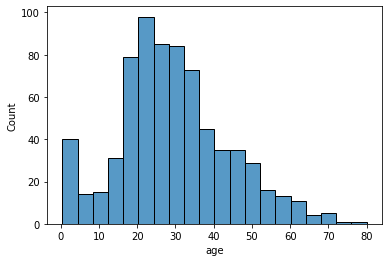

In [2]:
sns.histplot(data=titanic, x='age');
# 나이를 구간별로 나누어서, 각 구간에 해당되는 사람이 몇명인지 나타냄
# 구간 개수를 지정하는 bins 파라미터를 auto로 설정됨

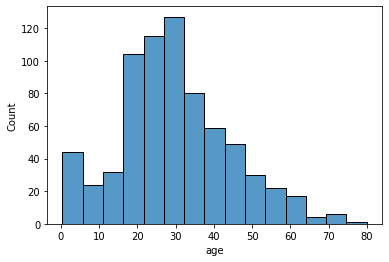

In [3]:
# 구간 개수 조정 
sns.histplot(data=titanic, x='age', bins=15);

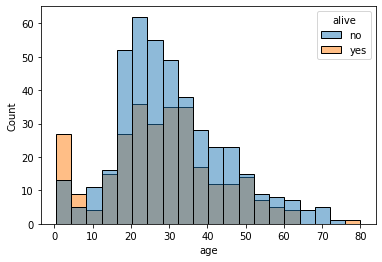

In [4]:
# 각각의 빈도에서 범주형 데이터를 표현할수 있음
# 나이별 빈도에 생존여부 범주형 데이터 설정
sns.histplot(data=titanic, x='age', hue='alive');
# 회색 구간이 두 그래프가 겹친 구간
# 각 구간별 값이 높은쪽 색상이 위로 넘쳐서 보임

# 해석
# 5세 이하는 생존이 더 많고, 15~30세까지는 중은 빈도가 더 높다
# 전체적으로는 10세이하, 75세 이상은 생존이 더 많고 대부분은 사망을 더 많이 했다

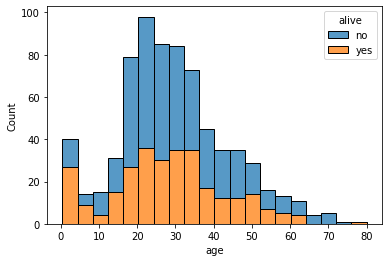

In [5]:
# 겹치치 않게 (포개지 않게) 수를 누적해서 표현한다면
sns.histplot(data=titanic, x='age', hue='alive', multiple='stack');

#### 커널밀도추정 함수 그래프(kdeplot)

- 히스토그램을 매끄럽게 곡선으로 연결
- EDA에서는 잘 사용 않함

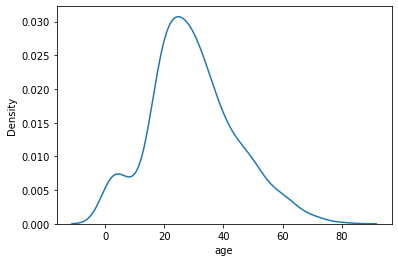

In [6]:
# 나이별 분포도
sns.kdeplot(data=titanic, x='age');
# y 밀도, x 나이

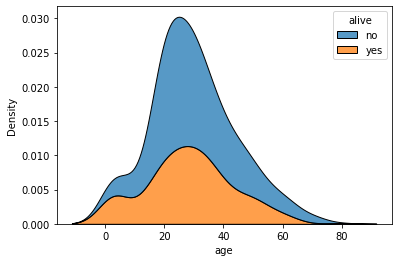

In [7]:
# 나이별 분포도 + 생존여부 누적
sns.kdeplot(data=titanic, x='age', hue='alive', multiple='stack');
# y 밀도, x 나이

#### 분포도 (displot)

- 캐글에서 분포도 그릴때 많이 사용
- 파라미터만 조정하면, 위의 2개 그래프를 모두 그릴수 있음


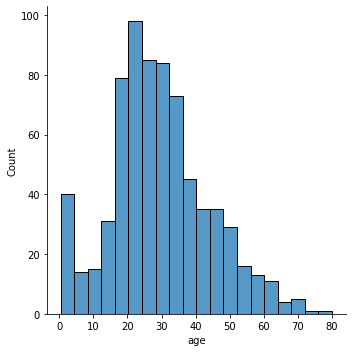

In [8]:
# 히스토그램
sns.displot(data=titanic, x='age');

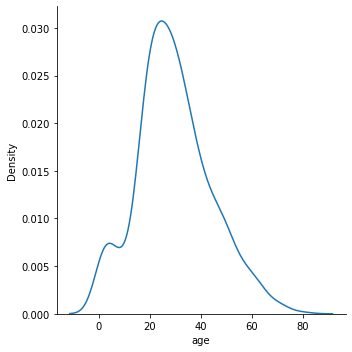

In [9]:
# 커널밀추정 함수 표현
sns.displot(data=titanic, x='age', kind='kde');

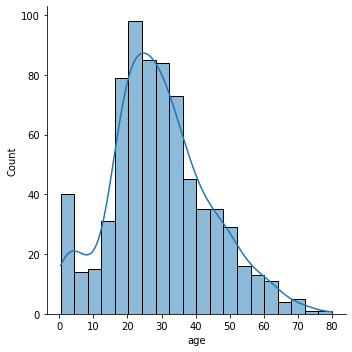

In [10]:
# 히스토그램 + 커널밀추정 함수 표현
sns.displot(data=titanic, x='age', kde=True);

#### 러그플롯(rugplot)

- 주변 분포(marginal distribution)를 나타내는 그래프
- 단독 보다는 주로 다른 분포도 그래프와 같이 사용

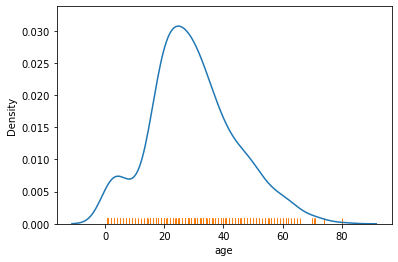

In [13]:
sns.kdeplot(data=titanic, x='age')
sns.rugplot(data=titanic, x='age');
# ;를 붙이면 테이블 주소가 않나온다

# 값이 밀집되어 있을수록 작은 선분들도 밀집되어 있다

# 범주형 데이터 시각화

- 막대(바)/파이, 포인트 플롯, 박스플롯, 바이올린플롯, 카운트플롯

### seaborn 주요 범주형 함수

#### 막대 그래프 (barplot)

- 범주형 데이터 값에 따라 수치형 데이터 값이 어떻게 달라지는지 파악
- 범주형 데이터에 따른 수치형 데이터의 평균과 신뢰구간을 그림
- 수치형 데이터 평균은 막대 높이, 신뢰구간은 오차 막대로 표현
- 원본 데이터 평균이 아닌, 샘플링한 데이터 평균을 구해줌
- x:범주형, y:수치형 데이터 전달

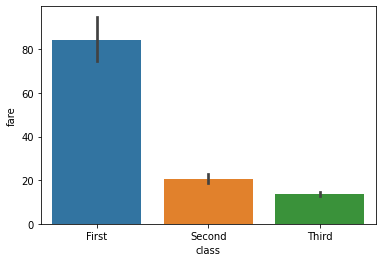

In [14]:
# x : class : 승객 등급별
# y : fare : 운임
# 막대의 높이 : 평균운임
# 막대 상단의 검은색 세로줄 : 오차 막대(신뢰구간)
# 해석 : 등급이 높을 수록 운임이 비싸고, 신뢰구간이 넓어진다
sns.barplot(x='class', y='fare', data=titanic);

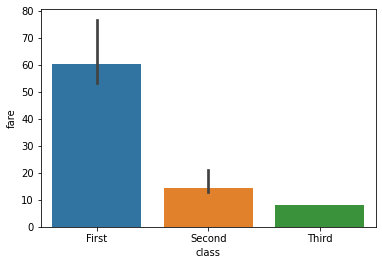

In [23]:
import numpy as np
# 평균이 아닌 중앙값을 기준으로 처리등 변경가능
sns.barplot(x='class', y='fare', data=titanic, estimator=np.median);

#### 포인트플롯 (pointplot)

- 막대 그래프와 모양만 다를뿐 동일한 정보 제공
- 점과 선으로만 표현
- 한 화면에 여러개의 바 그래프를 하 화면에서 그릴때 적합

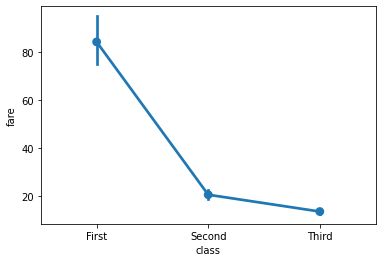

In [15]:
sns.pointplot(x='class', y='fare', data=titanic);

#### 박스플롯

- 5가지 요약 정보 제공
  - 제 1사분위수 : Q1, 전체 데이터 중 하위 25%에 해당되는 값
  - 제 2사분위수 : Q2, 50%에 해당하는 값(중앙값)
  - 제 3사분위수 : Q3, 상위 25%에 해당되는 값
  - 사분위 범위수(IQR) : Q3 -Q1
  - 최댓값 : Q3 + (1.5*IQR)
  - 최솟값 : Q1 - (1.5*IQR)
  - 이상치 : 최댓값보다 큰 값과 최솟값보다 작은 값 

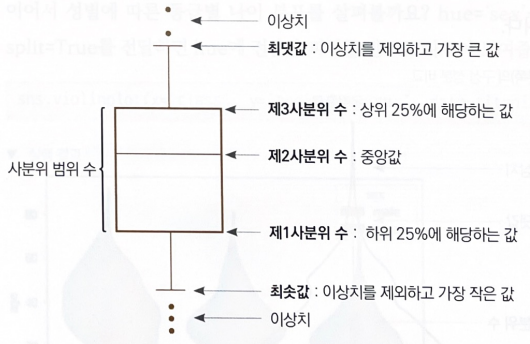

In [16]:
from IPython.display import Image
Image('/content/drive/MyDrive/edu/ml_ct_res/박스플롯구성.png')

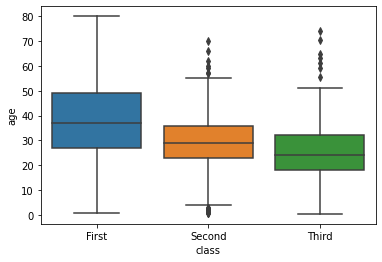

In [17]:
sns.boxplot(x='class', y='age', data=titanic);
# x:범주형데이터 : class (등급)
# y:연속형데이터 : age(나이)

#### 바이롤린플롯 (violinplot)

- 박스플롯 _ 커널밀도추정함수
- 박스플롯의 모든 정보 + 모양은 커널밀도추정함수 형태

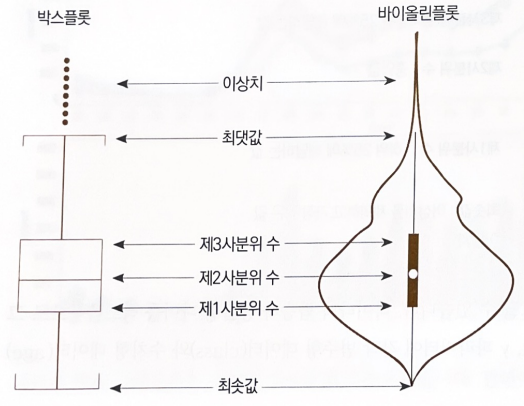

In [18]:
Image('/content/drive/MyDrive/edu/ml_ct_res/바이올린플롯.png')

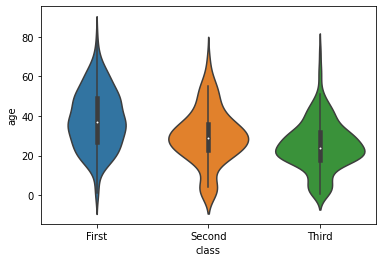

In [19]:
sns.violinplot(x='class', y='age', data=titanic);

# 5가지 요약수치를 보고싶다면 박스플롯
# 수치형 데이터의 전체적인 분포 양상을 알고 싶다면 바이올린플롯

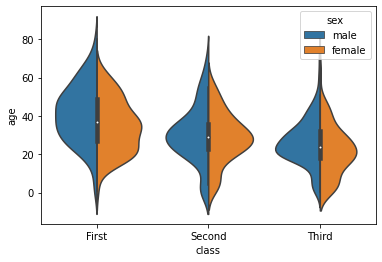

In [20]:
sns.violinplot(x='class', y='age', hue='sex', data=titanic, split=True);
# 남녀 비율에 대한 밀도 표시가 가능해서 해석이 보다 쉬워짐

#### 카운트플롯

- 범주형 데이터의 개수를확인 할때 사용하는 그래프


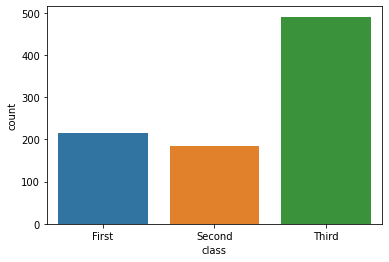

In [21]:
sns.countplot(x='class', data=titanic);

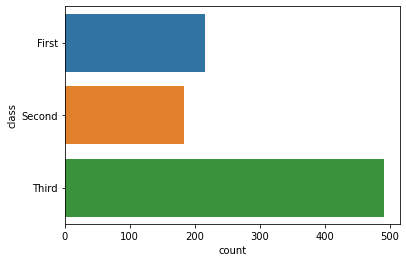

In [22]:
# 방향 바꾸기
sns.countplot(y='class', data=titanic);
# 범주형 변수가 많아서 보기 힘들때 사용

#### 파이 그래프(pie)

- 범주형 데이터별 비율을 알아볼때 사용
- seaborn은 미지원

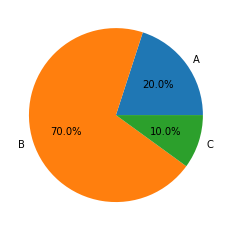

In [26]:
import matplotlib.pyplot as plt

x = [20,70,10]
labels = list('ABC')
plt.pie( x=x, labels=labels, autopct='%.1f%%');
# %.1f 소수점 1자리까지, %% % 표현

# 데이터 관게 시각화

#### 히트맵 (heatmap)

- 데이터간의 관계를 색상으로 표현
- 비교할 데이터가 많을때 사용

### 데이터 사이의 관계를 묘사

- 히트맵, 라인플롯, 산점도, 회귀선 포함 산점도

In [29]:
import seaborn as sns
flights = sns.load_dataset('flights')
flights.head(1)
# 범주형 (year, month), 수치형(passengers)

,year,month,passengers
0,1949,Jan,112


In [31]:
f_pv = flights.pivot(index='month', columns='year', values='passengers')

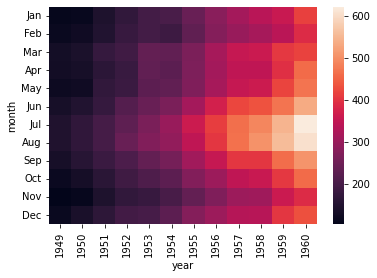

In [32]:
sns.heatmap(data=f_pv);
# 밀도를 통해 전체적인 양상을 확인할 수 있다

#### 라인플롯 (lineplot)


- 두 수치형 데이터 사이의 관계를 표현
- x 파라미터에 전달한 값에 따라 y 파라미터에 전달한 값의 평균과 95% 신뢰구간을 나타냄

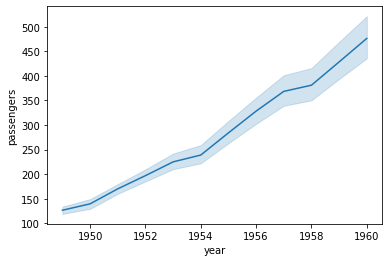

In [33]:
sns.lineplot(x='year', y='passengers', data=flights);

# x축( 년도 )의 값 년도가 갈수록, 평균 승객수가 증가함. 실선 주변의 음영은 95% 신뢰구간

#### 산점도 (scatterplot)

- 두 데이터 관계를 점으로 표현

In [35]:
tips = sns.load_dataset('tips')
tips.head(1)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2


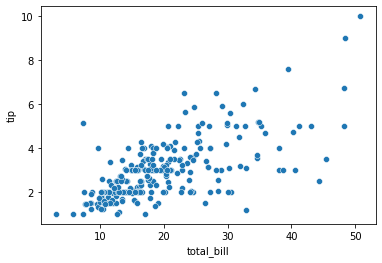

In [36]:
sns.scatterplot(x='total_bill', y='tip', data=tips);
# 총액과 팁에 대해 표현
# 총액이 늘면 팁도 늘어난다

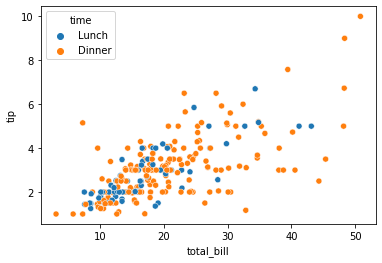

In [37]:
# hue 파라미터에 범주형 데이터를 넣어서 데이터를 나눔
sns.scatterplot(x='total_bill', y='tip', hue='time', data=tips);
# 런치, 디너가 통상 같은 추세를 보인다

#### 회귀선을 포함한 산점도 그래포(regplot)

- 산점도 + 회귀선을 동시에 그리는 함수
- 회귀선을 그리면 전반적인 상관관게 파익이 유리

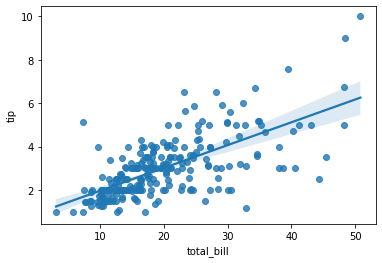

In [38]:
sns.regplot(x='total_bill', y='tip', data=tips);
# 음영 구간 95% 신뢰구간 표시

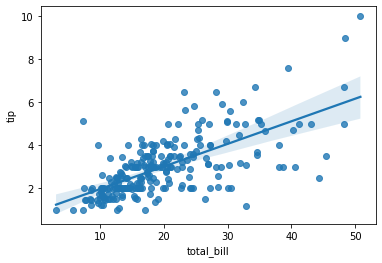

In [39]:
# 신뢰구간 99%까지 확대
sns.regplot(x='total_bill', y='tip', ci=99, data=tips);